# Prehodni pojavi v električnih krogih
### Gregor Kržmanc, 11. 5. 2021

## 1. UVOD
V vaji obravnavamo tri pojave v vezjih z uporniki, tuljavami in kondenzatorji.
## Praznjenje kond.

Napolnimo kondenzator in ga vežemo skupaj z upornikom R. Napetost na kond. se spreminja kot $U=U_0 \exp{(-t/\tau)}$, $\tau = RC$

## Polnjenje kond.

Zaporedno z upornikom R vežemo kond. s kapaciteto C. Kondenzator se polni kot $U = U_n (1-\exp{(-t/\tau))}$. (Un je napetost vira)

Če je R velik, ne smemo zanemariti $R_n$, notr. upora osciloskopa. V tem primeru velja $U = U_0 (1-\exp{(-t \alpha /\tau)})$, $\alpha = 1 + \frac{R}{R_n}$, $U_0 = U_n / \alpha$

## Nihanje v RLC vezju

Zvežemo zaporedno tuljavo L in upor R. Nato zaporedno zvežemo ta element s kondenzatorjem C. Ko napolnimo kond. in odklopimo napajanje, začne sistem dušeno nihati. $ U = -(I_0/(\omega_0 C))e^{-\beta t}\cos{(\omega_0 t)}$, $\beta = R/2L$, $\omega_0 = 1/\sqrt{LC}$, $\omega= \sqrt{ \omega_0^2-\beta^2}$

## 2. NALOGA
Z osciloskopom opazujemo prehodne pojave. Izmerimo relaksacijske čase in jih primerjamo z izračunami iz znanih lastnosti uporabljenih komponent.
## 3. MERITVE
### 3.1 Praznjenje
$$R = 39 k\Omega \pm 1 k\Omega$$
$$C = 25 pF (1 \pm 0.1)$$
$$U_n=12V$$
Ocenimo napako odčitanih časov na 2 ms, napetosti pa na 0.4 V.


In [1]:
import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
mili = 1e-3
prazn = pd.read_csv('data_praznjenje.dat', sep=' ')
poln = pd.read_csv('data_polnjenje.dat', sep=' ')
prazn['t'] = prazn['t'] * mili
poln['t'] = poln['t'] * mili
display(prazn)

,t,U
0,0.000,12.0
1,0.003,8.4
2,0.009,4.4
3,0.015,2.4
4,0.021,1.2
5,0.027,0.4


### 3.2 Polnjenje
$$ R= 2.7 M\Omega $$
(C enak kot v 3.1)
Ocenimo napako časov na 20 ms, napetosti pa 130 mV.

In [2]:
display(poln)

,t,U
0,0.000,0.00
1,0.025,0.43
2,0.125,1.61
3,0.225,2.28
4,0.275,1.88
5,0.525,2.95


### 3.3 Nihanje
Ocenimo napake odčitkov časov na 1 ms, amplitud napetosti na 0.09 V.
$$ L=1.227 H $$
$$ R=138 \Omega $$

Ampliude napetosti odčitamo v vrhovih sinusnega valovanja enkrat na nihajni čas.

In [3]:

nihanje = pd.read_csv('data_nihanje.dat', sep=' ')
model_nih = lambda t, a0, beta: a0 * np.exp(-beta*t)
casi_err = 1e-3
ampl_err = 0.09

N = 12
t = ufloat(40e-3, casi_err)
t0 = t/N
print('izmerimo', N, 'nihajev v', t, 's')
nn = nihanje.copy()
nn.columns=["N", "U[v]"]
display(nn)

izmerimo 12 nihajev v 0.0400+/-0.0010 s


,N,U[v]
0,1,1.77
1,2,1.38
2,3,1.07
3,4,0.89
4,5,0.67
5,6,0.53
6,7,0.44
7,8,0.36
8,9,0.27


## 4 REZULTATI
### 4.1 Praznjenje

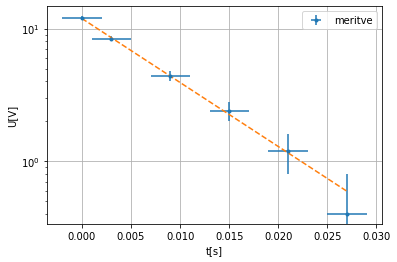

τ(izračunani)= RC = 9.8+/-1.0 ms
τ(izmerjeni)= 8.99+/-0.21 ms


In [4]:

model_prazn = lambda t, x0, _tau: x0*np.exp(-t/_tau)
model_poln = lambda t, x0, _tau: x0*(1-np.exp(-t/_tau))

popt, pcov = curve_fit(model_prazn, prazn['t'], prazn['U'], p0=(12.0, 1e-2))
e = np.sqrt(np.diag(pcov))
U0, tau = ufloat(popt[0], e[0]), ufloat(popt[1], e[1])
l = len(prazn['t'].values)
xe, ye = 2e-3, 0.4
plt.errorbar(prazn['t'].values, prazn['U'].values, xerr=[xe]*l, yerr=[ye]*l, fmt=".", label='meritve')
plt.grid()
_t = np.linspace(min(prazn['t']), max(prazn['t']), 1000)
plt.plot(_t, model_prazn(_t, U0.n, tau.n), "--")
plt.legend()
plt.xlabel('t[s]')
plt.yscale('log')
plt.ylabel('U[V]')
plt.show()

C1 = ufloat(0.25, 0.1*0.25) * 1e-6
R1 = ufloat(39, 1) * 1000
mtau1 = C1 * R1 * 1000
mtau = tau * 1000
print('τ(izračunani)= RC =', mtau1, 'ms')
print('τ(izmerjeni)=', mtau, 'ms')


### 4.2 Polnjenje

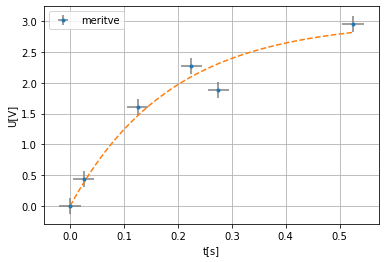

notr. upor Rn= 0.90+/-0.16 MΩ
τ(izračunani)= RC/α = 169+/-28 ms
τ(izmerjeni)= (1.9+/-0.6)e+02 ms


In [5]:

popt, pcov = curve_fit(model_poln, poln['t'].values, poln['U'].values, p0=(3.0, 0.4))
e = np.sqrt(np.diag(pcov))
Un, tau = ufloat(popt[0], e[0]), ufloat(popt[1], e[1])
R2 = 2.7e6

U_izvir = 12.0
Rn = R2 / (U_izvir / Un - 1)
alpha = ( R2/Rn + 1)
mtau2 = R2 * C1 * 1000 / alpha
mtau = tau * 1000

poln_err_t = 20e-3
poln_err_U = 130e-3

pt, pu = poln['t'].values, poln['U'].values,
plt.errorbar(pt, pu, xerr=[poln_err_t]*len(pt) , yerr=[poln_err_U]*len(pt) , ecolor="gray", fmt=".", label='meritve')
plt.grid()
_t = np.linspace(min(poln['t']), max(poln['t']), 1000)
plt.plot(_t, model_poln(_t, Un.n, tau.n), "--")
plt.legend()
plt.xlabel('t[s]')
plt.ylabel('U[V]')

plt.show()

print('notr. upor Rn=',Rn/1e6,'MΩ')
print('τ(izračunani)= RC/α =', mtau2, 'ms')
print('τ(izmerjeni)=', mtau, 'ms')

### 4.3 Nihanje
K. dušenja $\beta$ izračunamo na 2 načina:
* $\beta = \frac{1}{N t_0} \ln{\frac{U(t_0)}{U(t_8)}}$
* S fitanjem premice na graf amplitude v odvisnosti od časa.


Končni rezultat sestavimo iz rezultata druge metode in napake prve metode, saj ocenjujemo, da daje prva metoda boljšo oceno napake.

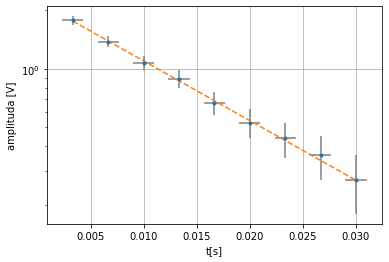

ω(izmerjeni)=2π/t0= (1.88+/-0.05)e+03 /s
ω0(izrač. lastna frek.)= (1.81+/-0.09)e+03 /s
ω(izrač.)=sqrt((ω0)^2-beta^2)= (1.80+/-0.09)e+03 /s
β(teor.)=R/(2L)= 56 /s
β(izmerjeni)= 71+/-13 /s
I_0= 87.0 mA


In [6]:

omega = 2*np.pi/t0

casi = nihanje['N'].values * t0.n
ampl = nihanje['A'].values
popt, pcov = curve_fit(model_nih, casi, ampl)
a0, a9 = ufloat(ampl[0], ampl_err), ufloat(ampl[-1], ampl_err)
beta_2 = 1/8/t0*unumpy.log(a0/a9)

beta = ufloat(popt[1], beta_2.s) # uporabimo napako od beta2 !

plt.errorbar(casi, ampl, xerr=[casi_err]*len(casi) , yerr=[ampl_err]*len(casi) , ecolor="gray", fmt=".", label='meritve')
_t = np.linspace(min(casi), max(casi), 1000)
plt.plot(_t, model_nih(_t, popt[0], beta.n), "--")
plt.grid()
plt.xlabel('t[s]')
plt.ylabel('amplituda [V]')
plt.yscale('log')
plt.show()

L = 1.227 #H
R = 138 #Ohm
U=12
beta_1 = R/(2*L)
omega_0_1 = (1/(L*C1))**0.5
omega_1 = (omega_0_1**2 - beta_1**2)**0.5

print('ω(izmerjeni)=2π/t0=',omega,'/s')
print('ω0(izrač. lastna frek.)=', omega_0_1,'/s')
print('ω(izrač.)=sqrt((ω0)^2-beta^2)=',omega_1,'/s')

print('β(teor.)=R/(2L)=', round(beta_1),'/s')
print('β(izmerjeni)=',beta,'/s')
print('I_0=', round(1e3 * U / R, 1) , 'mA')